In [116]:
#putting data into pandas dataframe
df = pd.read_csv('/Users/shekhara/Downloads/hcvdat0.csv')

In [117]:
df = df.drop(columns=['Unnamed: 0']) #dropping unnecessary column
df.dropna(axis = 0, inplace = True)
print(df)

          Category  Age Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5   7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3  18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7  36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0  30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1  32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...   ...    ...   ...    ...   ...   
608    3=Cirrhosis   58   f  34.0   46.4  15.0  150.0   8.0   6.26  3.98   
609    3=Cirrhosis   59   f  39.0   51.3  19.6  285.8  40.0   5.77  4.51   
610    3=Cirrhosis   62   f  32.0  416.6   5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8   2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3   3.5   99.0  48.0   1.66  3.63   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5  
2     86.

In [118]:
# encoding sex column
df.replace({'Sex':{'m':0,'f':1}}, inplace=True)
# encoding Category column
df.replace({'Category':{'0=Blood Donor':0,'0s=suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':1, '3=Cirrhosis':1}}, inplace=True)
print(df)
#check for missing values
df.isnull().sum().sum()

     Category  Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA  \
0           0   32    0  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   
1           0   32    0  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   
2           0   32    0  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   
3           0   32    0  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   
4           0   32    0  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   
..        ...  ...  ...   ...    ...   ...    ...   ...    ...   ...    ...   
608         1   58    1  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   
609         1   59    1  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1   
610         1   62    1  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7   
611         1   64    1  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   
612         1   64    1  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   

       GGT  PROT  
0     12.1  69.0  
1     15.6  7

0

## EDA and Graphs

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    int64  
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    int64  
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 64.4 KB


In [120]:
#Change the classes columns to categorical for better visualization 

#categorize columns: Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice
data_cat=df[['Category','Age','Sex','ALB','ALP','ALT','AST','BIL','CHE','CREA','GGT','PROT']]

In [121]:
data_cat.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,76.0,29.9,68.7


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


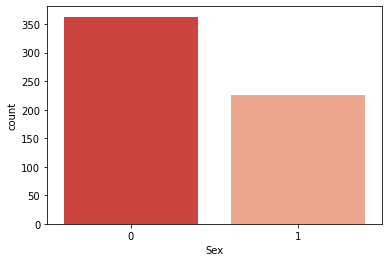

In [122]:
#Gain insights of the categorical data:
sns.countplot(data_cat['Sex'],palette="Reds_r")
plt.show()

<AxesSubplot:>

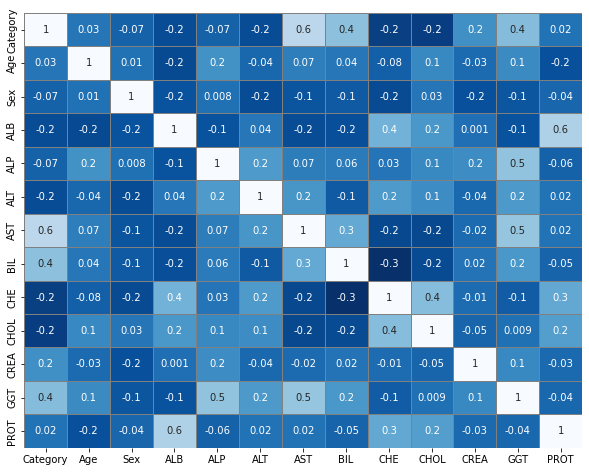

In [123]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey')

<AxesSubplot:xlabel='Category', ylabel='Age'>

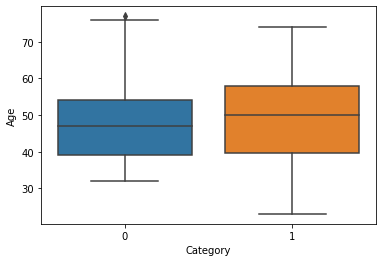

In [124]:
sns.boxplot(data=data_cat, x='Category', y='Age')

## Applying binary K means

In [125]:
#putting the labels into seperate variable
Y = data_cat.drop(columns='Category')
X = data_cat['Category']
print(X)
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
608    1
609    1
610    1
611    1
612    1
Name: Category, Length: 589, dtype: int64
     Age  Sex   ALB    ALP   ALT    AST   BIL    CHE   CREA    GGT  PROT
0     32    0  38.5   52.5   7.7   22.1   7.5   6.93  106.0   12.1  69.0
1     32    0  38.5   70.3  18.0   24.7   3.9  11.17   74.0   15.6  76.5
2     32    0  46.9   74.7  36.2   52.6   6.1   8.84   86.0   33.2  79.3
3     32    0  43.2   52.0  30.6   22.6  18.9   7.33   80.0   33.8  75.7
4     32    0  39.2   74.1  32.6   24.8   9.6   9.15   76.0   29.9  68.7
..   ...  ...   ...    ...   ...    ...   ...    ...    ...    ...   ...
608   58    1  34.0   46.4  15.0  150.0   8.0   6.26   56.0   49.7  80.6
609   59    1  39.0   51.3  19.6  285.8  40.0   5.77  136.1  101.1  70.5
610   62    1  32.0  416.6   5.9  110.3  50.0   5.57   55.7  650.9  68.5
611   64    1  24.0  102.8   2.9   44.4  20.0   1.54   63.0   35.9  71.3
612   64    1  29.0   87.3   3.5   99.0  48.0   1.66   6

Code-book :
 [[ 49.68831169   0.22077922  40.2025974   82.01558442  40.27012987
   80.58701299  21.53246753   7.55792208 106.00779221 130.06623377
   71.6025974 ]
 [ 47.07617188   0.40820312  41.83808594  66.03378906  24.51582031
   26.73242187   9.43691406   8.30074219  78.00878906  24.38242187
   71.93339844]] 

Clusters :
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

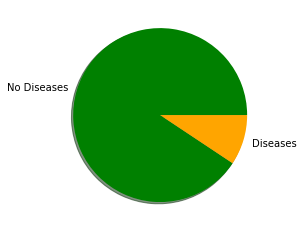

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import whiten, kmeans, vq
 
dataset = Y
 
# generate code book
centroids, mean_dist = kmeans(dataset, 2)
print("Code-book :\n", centroids, "\n")
 
clusters, dist = vq(dataset, centroids)
print("Clusters :\n", clusters, "\n")
 
# count non-dis patients
non_diab = list(clusters).count(0)

# count disease patients
diab = list(clusters).count(1)

# depict illustration
x_axis = []
x_axis.append(diab)
x_axis.append(non_diab)
 
colors = ['green', 'orange']
 
print("No.of Blood Donor with no Diseases : " + str(x_axis[0]) +
      "\nNo.of Blood Donor with Diseases : " + str(x_axis[1]))
 
y = ['No Diseases', 'Diseases']
 
plt.pie(x_axis, labels=y, colors=colors, shadow='true')
plt.show()

In [127]:
true_labels = np.array(X)
n=0
for i in range(len(clusters)):
    if true_labels[i] != clusters [i]:
        n += 1
print(n)

Accuracy = (n/Y.shape[0])*100
print('Accuracy:', Accuracy)


538
Accuracy: 91.34125636672326


## Applying K means on data with blood donor with diseases

In [128]:
#Reloading data in pandas dataframe for pre processing
data = pd.read_csv('/Users/shekhara/Downloads/hcvdat0.csv')
data = data.drop(columns=['Unnamed: 0']) #dropping unnecessary column
data.dropna(axis = 0, inplace = True)
# encoding sex column
data.replace({'Sex':{'m':0,'f':1}}, inplace=True)
# encoding Category column
data.replace({'Category':{'0=Blood Donor':0,'0s=suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':2, '3=Cirrhosis':3}}, inplace=True)
print(data)
#check for missing values
data.isnull().sum().sum()

#dataset with diseases
data_with_dis = data[data['Category'] != 0]
print(data_with_dis)

     Category  Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA  \
0           0   32    0  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   
1           0   32    0  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   
2           0   32    0  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   
3           0   32    0  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   
4           0   32    0  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   
..        ...  ...  ...   ...    ...   ...    ...   ...    ...   ...    ...   
608         3   58    1  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   
609         3   59    1  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1   
610         3   62    1  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7   
611         3   64    1  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   
612         3   64    1  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   

       GGT  PROT  
0     12.1  69.0  
1     15.6  7

In [129]:
#putting the labels into seperate variable
Y_dis = data_with_dis.drop(columns='Category')
X_dis = data_with_dis['Category']


Code-book :
 [[5.76666667e+01 1.66666667e-01 3.68333333e+01 1.56950000e+02
  1.83000000e+01 1.67916667e+02 3.70000000e+01 4.65666667e+00
  4.65666667e+00 8.29500000e+01 4.34600000e+02 7.37166667e+01]
 [4.46666667e+01 3.33333333e-01 3.40000000e+01 1.46033333e+02
  2.76666667e+00 3.03666667e+01 9.00000000e+00 5.89000000e+00
  4.24666667e+00 6.94666667e+02 1.17000000e+02 6.17000000e+01]
 [4.74893617e+01 2.97872340e-01 3.89787234e+01 4.55255319e+01
  1.53468085e+01 9.25148936e+01 3.61702128e+01 6.86574468e+00
  4.54574468e+00 7.34340426e+01 6.75361702e+01 7.26808511e+01]] 

Clusters :
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1
 0 2 2 2 2 0 2 2 2 0 2 2 1 2 2 2 0 2 2] 

No.of Blood Donor with Hepatitis : 6
No.of Blood Donor with Fibrosis : 3
 No.of Blood Donor with Cirrhosis :47


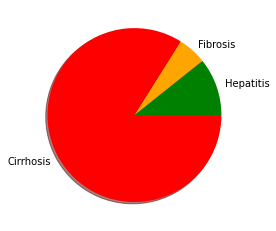

In [130]:
dataset = Y_dis
 
# generate code book
centroids, mean_dist = kmeans(dataset, 3)
print("Code-book :\n", centroids, "\n")
 
clusters, dist = vq(dataset, centroids)
print("Clusters :\n", clusters, "\n")
 
# count non-dis patients
disease1 = list(clusters).count(0)

# count disease patients
disease2 = list(clusters).count(1)
disease3 = list(clusters).count(2)
# depict illustration
x_axis = []
x_axis.append(disease1)
x_axis.append(disease2)
x_axis.append(disease3)
 
colors = ['green', 'orange','red']
 
print("No.of Blood Donor with Hepatitis : " + str(x_axis[0]) +
      "\nNo.of Blood Donor with Fibrosis : " + str(x_axis[1]) +
       "\n No.of Blood Donor with Cirrhosis :" + str(x_axis[2]))
 
k = ['Hepatitis', 'Fibrosis','Cirrhosis']
 
plt.pie(x_axis, labels=k, colors=colors, shadow='true')
plt.show()

In [131]:
#Checking the accuracy
true_labels1 = np.array(X_dis)
n=0
for i in range(len(clusters)):
    if true_labels1[i] != clusters [i]:
        n += 1
print(n)

Accuracy = (n/Y_dis.shape[0])*100
print('Accuracy:', Accuracy)

44
Accuracy: 78.57142857142857


## Self Organizing Map

In [144]:
#susi is a SOM library used for supervised, semi supervised and unsupervised learning
import susi
from sklearn.model_selection import train_test_split
#Set Class as the target value 
Y = data['Category']
X = data.drop('Category', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  

# initialize and fit SuSi
som = susi.SOMClassifier()
som.fit(X_train, Y_train)

# predict and calculate the accuracy score
y_pred = som.predict(X_test)
print(som.score(X_test, Y_test))

0.7796610169491526


### Another way of SOM